## Category X Analysis Workbook Template
**Written by: INSERT NAME**

In [2]:
#run this when you open this notebook for the first time to begin work
%pip install -r requirements.txt --upgrade

  Using cached Pint-0.24.4-py3-none-any.whl.metadata (8.5 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached gspread-6.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached gspread_pandas-3.3.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached Bottleneck-1.4.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
  Using cached eep153_tools-0.12.4-py2.py3-none-any.whl.metadata (363 bytes)
  Using cached fooddatacentral-1.0.10-py3-none-any.whl.metadata (1.9 kB)
  Using cached python_gnupg-0.5.4-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached flexcache-0.3-py3-none-any.whl.metadata (7.0 kB)
  Using cached flexparser-0.4-py3-none-any.whl.metadata (18 kB)
Using cached Pint-0.24.4-py3-none-any.whl (302 kB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
Using cached gspread_pandas-3.3.0-py2.py3-none-any.w

In [3]:
from p2utilityfunctions import solvercomplete, nutrition, nutrient_search
#for documentation on any function run "function?", ex nutrition?
import numpy as np
import pandas as pd
from eep153_tools.sheets import read_sheets
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1: Setting constraints and general variables

In [4]:
age = 25 # change this depending on prison average
sex = "F" #change this as well; M for Male and F for Female
activity_level = "Active" #change this; can be Moderately Active, Sedentary, or Active

In [5]:
# time to make minimizing and maximizing constraints
bmin, bmax = nutrition(age, sex, activity_level)
print(f"Current minimizing constraints are: \n \n {bmin}")
print(f"Current maximum constraints are: \n \n {bmax}")

Current minimizing constraints are: 
 
 Nutrient
Energy            2400.0
Protein             46.0
Carbohydrate       130.0
Dietary Fiber       28.0
Linoleic Acid       12.0
Linolenic Acid       1.1
Calcium           1000.0
Iron                18.0
Magnesium          310.0
Phosphorus         700.0
Potassium         4700.0
Zinc                 8.0
Copper               0.9
Selenium            55.0
Vitamin A          700.0
Vitamin E           15.0
Vitamin D           15.0
Vitamin C           75.0
Thiamin              1.1
Riboflavin           1.1
Niacin              14.0
Vitamin B6           1.3
Vitamin B12          2.4
Choline            425.0
Vitamin K           90.0
Folate             400.0
Name: Female_19_30, dtype: float64
Current maximum constraints are: 
 
 Nutrient
Sodium    2300.0
Name: Female_19_30, dtype: float64


/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


#### A Note On Case Specific Constraint Editing
Feel free to add in other maximizing constraints if you think they are relevant. Just make sure to justify them

### Part 2: Determining recipe and nutrition set

**Nutrition set is what constrains the options, since we are using a left join (or merge) on nutrients and recipes. The Nutrition dataset provides nutritional values and the recipe set provides weights**

In [6]:
data_url = "https://docs.google.com/spreadsheets/d/1xqixhrAoDq9rWJf_FC3Y2eXdd010DTLPCS7JJMCfwP8/edit?usp=sharing"
recipes = read_sheets(data_url, sheet="recipes")
nutrients = read_sheets(data_url, sheet="nutrients")

In [7]:
nutrients.head()

,ingred_code,Ingredient description,Capric acid,Lauric acid,Myristic acid,Palmitic acid,Palmitoleic acid,Stearic acid,Oleic acid,Linoleic Acid,...,Vitamin B12,"Vitamin B-12, added",Vitamin B6,Vitamin C,Vitamin D,Vitamin E,"Vitamin E, added",Vitamin K,Water,Zinc
0,1001,"Butter, salted",2.529,2.587,7.436,21.697,0.961,9.999,19.961,2.728,...,0.17,0.0,0.003,0.0,0.0,2.32,0.0,7.0,15.87,0.09
1,1002,"Butter, whipped, with salt",2.039,2.354,7.515,20.531,1.417,7.649,17.370,2.713,...,0.07,0.0,0.008,0.0,0.0,1.37,0.0,4.6,16.72,0.05
2,1003,"Butter oil, anhydrous",2.495,2.793,10.005,26.166,2.228,12.056,25.026,2.247,...,0.01,0.0,0.001,0.0,0.0,2.80,0.0,8.6,0.24,0.01
3,1004,"Cheese, blue",0.601,0.491,3.301,9.153,0.816,3.235,6.622,0.536,...,1.22,0.0,0.166,0.0,0.5,0.25,0.0,2.4,42.41,2.66
4,1005,"Cheese, brick",0.585,0.482,3.227,8.655,0.817,3.455,7.401,0.491,...,1.26,0.0,0.065,0.0,0.5,0.26,0.0,2.5,41.11,2.60


**Now, drop any foods within ingredients that you want in order to constrain to the specific area of interest (ex. particular population or prison)**

Below is a search function. Feel free to use it to either view particular foods within the dataset or set cut = True if you want to simply cut out all food options in the final result that have the search term in it. The function searches by Ingredient Description.

In [8]:
nutrients.loc[[1000, 2000, 10]]

,ingred_code,Ingredient description,Capric acid,Lauric acid,Myristic acid,Palmitic acid,Palmitoleic acid,Stearic acid,Oleic acid,Linoleic Acid,...,Vitamin B12,"Vitamin B-12, added",Vitamin B6,Vitamin C,Vitamin D,Vitamin E,"Vitamin E, added",Vitamin K,Water,Zinc
1000,9304,"Raspberries, canned, red, heavy syrup pack, so...",0.00,0.000,0.000,0.003,0.000,0.001,0.011,0.045,...,0.00,0.0,0.042,8.7,0.0,0.59,0.0,5.2,75.33,0.16
2000,19039,"Snacks, popcorn, caramel-coated, without peanuts",0.09,0.100,0.370,2.120,0.100,0.720,2.780,4.070,...,0.01,0.0,0.028,0.0,0.0,1.20,0.0,12.5,2.80,0.58
10,1013,"Cheese, cottage, creamed, with fruit",0.07,0.061,0.401,1.159,0.137,0.438,0.899,0.088,...,0.53,0.0,0.068,1.4,0.0,0.04,0.0,0.4,79.64,0.33


In [9]:
#example use
nutrient_search('Plantain', nutrients).head()
#other example uses
# nutrient_search(['dog', 'cinnamon'], nutrients) 
# -> this would return all entries containing dog or cinnamon
# nutrient_search(['dog', 'cinnamon'], nutrients, cut = True) 
# -> this would return all entries not containing dog or cinammon (acting as a filter)
# nutrient_search('cheese', nutrients)
# -> this would return all entries containing cheese in ingredient descriptions

,ingred_code,Ingredient description,Capric acid,Lauric acid,Myristic acid,Palmitic acid,Palmitoleic acid,Stearic acid,Oleic acid,Linoleic Acid,...,Vitamin B12,"Vitamin B-12, added",Vitamin B6,Vitamin C,Vitamin D,Vitamin E,"Vitamin E, added",Vitamin K,Water,Zinc
986,9277,"plantains, raw",0.001,0.002,0.002,0.096,0.009,0.005,0.021,0.043,...,0.0,0.0,0.299,18.4,0.0,0.14,0.0,0.7,65.28,0.14
987,9278,"plantains, cooked",0.000,0.001,0.001,0.047,0.005,0.002,0.010,0.021,...,0.0,0.0,0.240,10.9,0.0,0.13,0.0,0.7,67.30,0.13
2390,25027,"snacks, plantain chips, salted",0.036,0.033,0.210,7.084,0.116,0.781,5.473,11.617,...,0.0,0.0,0.460,32.1,0.0,5.04,0.0,28.6,2.09,0.37


## Running the optimization
Here is a call to the optimization function. Make sure to pass in the updated nutrients you use to the function: *solvercomplete(sex, age,recipes, **updated nutrients**, bmin, bmax)*

In [9]:
#to edit the below set of visualizations for the new set of ingredients just reassign nutrients right before to the constrained nutrients

In [10]:
def accross_age_wrapper(activity_level, nutrition_df):
    sexes = ['M', 'F']
    ages = [10, 20, 30, 40, 50, 60, 70, 80]
    output = []
    for sex in sexes:
        for agesp in ages:
            bmin, bmax = nutrition(agesp, sex, activity_level)
            cost = solvercomplete(sex, agesp, recipes, nutrition_df, bmin, bmax)
            output += [cost]

In [11]:
#takes approx 10 minutes to run so be patient. 
#feel free to run in chunks if preferred and minimize printed output screen below so notebook doesnt become huge
MFACT = accross_age_wrapper('Active', nutrients)
MFSED = accross_age_wrapper('Sedentary', nutrients)
MFMA = accross_age_wrapper('Moderately Active', nutrients)

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for M's of age 10 is $2.37 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          9.60
Carp, steamed or poached                    0.05
Split peas, from dried, fat added           6.20
Rice, white, cooked, made with margarine    0.79
Cereal, rice flakes                         0.14
Ripe plantain, raw                          1.84
Corn oil                                    0.26
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2200.0          2200.0
Protein           85.965011            34.0
Carbohydrate     253.517218           130.0
Dietary Fiber     52.309209            25.2
Linoleic Acid     35.838418            12.0
Linolenic Acid     3.143882             1.2
Calcium              1300.0          1300.0
Iron              13.968497             8.0
Magnesium        392.106319           

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for M's of age 20 is $2.71 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          6.82
Egg, yolk only, raw                         0.28
Split peas, from dried, fat added           4.22
Rice, white, cooked, made with margarine    2.09
Cereal, rice flakes                         0.15
Cereal, toasted oat                         0.16
Ripe plantain, raw                          4.10
Corn oil                                    0.74
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               3000.0          3000.0
Protein            71.80434            56.0
Carbohydrate     310.093088           130.0
Dietary Fiber     44.353713            33.6
Linoleic Acid     69.953839            17.0
Linolenic Acid      4.43929             1.6
Calcium         1041.783328          1000.0
Iron              20.111868      

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


KeyboardInterrupt: 

In [10]:
ages = [10, 20, 30, 40, 50, 60, 70, 80]
sexes = ['M', 'F']


In [11]:
#raw, not in function
import time
start_time = time.time()
sexes = ['M', 'F']
ages = [10, 20, 30, 40, 50, 60, 70, 80]
output = []
for sex in sexes:
    for agesp in ages:
        bmin, bmax = nutrition(agesp, sex, "Active")
        cost = solvercomplete(sex, agesp, recipes, nutrients, bmin, bmax)
        output += [cost]
end_time = time.time()

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for M's of age 10 is $2.37 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          9.60
Carp, steamed or poached                    0.05
Split peas, from dried, fat added           6.20
Rice, white, cooked, made with margarine    0.79
Cereal, rice flakes                         0.14
Ripe plantain, raw                          1.84
Corn oil                                    0.26
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2200.0          2200.0
Protein           85.965011            34.0
Carbohydrate     253.517218           130.0
Dietary Fiber     52.309209            25.2
Linoleic Acid     35.838418            12.0
Linolenic Acid     3.143882             1.2
Calcium              1300.0          1300.0
Iron              13.968497             8.0
Magnesium        392.106319           

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for M's of age 20 is $2.71 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          6.82
Egg, yolk only, raw                         0.28
Split peas, from dried, fat added           4.22
Rice, white, cooked, made with margarine    2.09
Cereal, rice flakes                         0.15
Cereal, toasted oat                         0.16
Ripe plantain, raw                          4.10
Corn oil                                    0.74
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               3000.0          3000.0
Protein            71.80434            56.0
Carbohydrate     310.093088           130.0
Dietary Fiber     44.353713            33.6
Linoleic Acid     69.953839            17.0
Linolenic Acid      4.43929             1.6
Calcium         1041.783328          1000.0
Iron              20.111868      

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for M's of age 30 is $2.71 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          6.82
Egg, yolk only, raw                         0.28
Split peas, from dried, fat added           4.22
Rice, white, cooked, made with margarine    2.09
Cereal, rice flakes                         0.15
Cereal, toasted oat                         0.16
Ripe plantain, raw                          4.10
Corn oil                                    0.74
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               3000.0          3000.0
Protein            71.80434            56.0
Carbohydrate     310.093088           130.0
Dietary Fiber     44.353713            33.6
Linoleic Acid     69.953839            17.0
Linolenic Acid      4.43929             1.6
Calcium         1041.783328          1000.0
Iron              20.111868      

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for M's of age 40 is $2.66 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          6.47
Carp, steamed or poached                    0.02
Egg, yolk only, raw                         0.28
Split peas, from dried, fat added           4.29
Rice, white, cooked, made with margarine    2.10
Cereal, rice flakes                         0.14
Cereal, toasted oat                         0.16
Wheat bran, unprocessed                     0.01
Ripe plantain, raw                          4.12
Corn oil                                    0.52
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2800.0          2800.0
Protein           71.651366            56.0
Carbohydrate     310.420644           130.0
Dietary Fiber     45.406746            30.8
Linoleic Acid     58.154602            17.0
Linolenic Acid     4.20

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for M's of age 50 is $2.66 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          6.47
Carp, steamed or poached                    0.02
Egg, yolk only, raw                         0.28
Split peas, from dried, fat added           4.29
Rice, white, cooked, made with margarine    2.10
Cereal, rice flakes                         0.14
Cereal, toasted oat                         0.16
Wheat bran, unprocessed                     0.01
Ripe plantain, raw                          4.12
Corn oil                                    0.52
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2800.0          2800.0
Protein           71.651366            56.0
Carbohydrate     310.420644           130.0
Dietary Fiber     45.406746            30.8
Linoleic Acid     58.154602            17.0
Linolenic Acid     4.20

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for M's of age 60 is $2.62 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                                   8.16
Egg, yolk only, raw                                  0.24
Split peas, from dried, fat added                    4.99
Rice, white, cooked, made with margarine             1.63
Cereal (Kellogg's All-Bran Complete Wheat Flakes)    0.02
Cereal, rice flakes                                  0.20
Wheat bran, unprocessed                              0.03
Ripe plantain, raw                                   3.22
Mustard greens, fresh, cooked, no added fat          0.02
Corn oil                                             0.38
Fruit juice drink, added calcium (Sunny D)           0.47
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2600.0          2600.0
Protein           78.988207            56.0
Carbohy

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for M's of age 70 is $2.62 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                                   8.16
Egg, yolk only, raw                                  0.24
Split peas, from dried, fat added                    4.99
Rice, white, cooked, made with margarine             1.63
Cereal (Kellogg's All-Bran Complete Wheat Flakes)    0.02
Cereal, rice flakes                                  0.20
Wheat bran, unprocessed                              0.03
Ripe plantain, raw                                   3.22
Mustard greens, fresh, cooked, no added fat          0.02
Corn oil                                             0.38
Fruit juice drink, added calcium (Sunny D)           0.47
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2600.0          2600.0
Protein           78.988207            56.0
Carbohy

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for M's of age 80 is $2.57 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                                   8.16
Egg, yolk only, raw                                  0.24
Split peas, from dried, fat added                    4.99
Rice, white, cooked, made with margarine             1.63
Cereal (Kellogg's All-Bran Complete Wheat Flakes)    0.02
Cereal, rice flakes                                  0.20
Wheat bran, unprocessed                              0.03
Ripe plantain, raw                                   3.21
Mustard greens, fresh, cooked, no added fat          0.02
Corn oil                                             0.16
Fruit juice drink, added calcium (Sunny D)           0.47
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2400.0          2400.0
Protein           79.006986            56.0
Carbohy

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for F's of age 10 is $2.31 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          9.60
Carp, steamed or poached                    0.05
Split peas, from dried, fat added           6.20
Rice, white, cooked, made with margarine    0.79
Cereal, rice flakes                         0.14
Ripe plantain, raw                          1.84
Corn oil                                    0.04
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2000.0          2000.0
Protein           85.965011            34.0
Carbohydrate     253.517218           130.0
Dietary Fiber     52.309209            22.4
Linoleic Acid     23.946195            10.0
Linolenic Acid     2.885882             1.0
Calcium              1300.0          1300.0
Iron              13.968497             8.0
Magnesium        392.106319           

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for F's of age 20 is $2.51 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          6.85
Carp, steamed or poached                    0.08
Egg, yolk only, raw                         0.10
Split peas, from dried, fat added           5.06
Rice, white, cooked, made with margarine    1.71
Cereal, rice flakes                         0.06
Cereal, toasted oat                         0.18
Ripe plantain, raw                          3.53
Corn oil                                    0.21
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2400.0          2400.0
Protein           75.212975            46.0
Carbohydrate     295.338833           130.0
Dietary Fiber     49.525191            28.0
Linoleic Acid     39.148942            12.0
Linolenic Acid     3.688637             1.1
Calcium         1037.119697 

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for F's of age 30 is $2.51 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          6.85
Carp, steamed or poached                    0.08
Egg, yolk only, raw                         0.10
Split peas, from dried, fat added           5.06
Rice, white, cooked, made with margarine    1.71
Cereal, rice flakes                         0.06
Cereal, toasted oat                         0.18
Ripe plantain, raw                          3.53
Corn oil                                    0.21
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2400.0          2400.0
Protein           75.212975            46.0
Carbohydrate     295.338833           130.0
Dietary Fiber     49.525191            28.0
Linoleic Acid     39.148942            12.0
Linolenic Acid     3.688637             1.1
Calcium         1037.119697 

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for F's of age 40 is $2.46 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          6.93
Carp, steamed or poached                    0.08
Egg, yolk only, raw                         0.10
Split peas, from dried, fat added           5.04
Rice, white, cooked, made with margarine    1.66
Cereal, rice flakes                         0.07
Cereal, toasted oat                         0.18
Ripe plantain, raw                          3.52
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2200.0          2200.0
Protein           75.219377            46.0
Carbohydrate     294.444726           130.0
Dietary Fiber     49.347705            25.2
Linoleic Acid     27.669828            12.0
Linolenic Acid     3.394831             1.1
Calcium         1046.009687          1000.0
Iron                   18.0      

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for F's of age 50 is $2.46 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          6.93
Carp, steamed or poached                    0.08
Egg, yolk only, raw                         0.10
Split peas, from dried, fat added           5.04
Rice, white, cooked, made with margarine    1.66
Cereal, rice flakes                         0.07
Cereal, toasted oat                         0.18
Ripe plantain, raw                          3.52
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2200.0          2200.0
Protein           75.219377            46.0
Carbohydrate     294.444726           130.0
Dietary Fiber     49.347705            25.2
Linoleic Acid     27.669828            12.0
Linolenic Acid     3.394831             1.1
Calcium         1046.009687          1000.0
Iron                   18.0      

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for F's of age 60 is $2.46 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          8.70
Egg, yolk only, raw                         0.09
Split peas, from dried, fat added           4.70
Rice, white, cooked, made with margarine    1.73
Cereal, rice flakes                         0.14
Cereal, toasted oat                         0.07
Ripe plantain, raw                          3.39
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2200.0          2200.0
Protein           76.176712            46.0
Carbohydrate     291.966097           130.0
Dietary Fiber     45.294506            22.4
Linoleic Acid     27.356054            11.0
Linolenic Acid     3.336789             1.1
Calcium         1218.111615          1200.0
Iron              16.423539             8.0
Magnesium        406.166259           

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for F's of age 70 is $2.44 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                                   9.70
Egg, yolk only, raw                                  0.08
Split peas, from dried, fat added                    4.48
Rice, white, cooked, made with margarine             1.17
Cereal (Kellogg's All-Bran Complete Wheat Flakes)    0.04
Cereal, rice flakes                                  0.05
Cereal, toasted oat                                  0.10
Ripe plantain, raw                                   3.22
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2000.0          2000.0
Protein           76.637958            46.0
Carbohydrate      275.03779           130.0
Dietary Fiber     44.011434            22.4
Linoleic Acid     21.849728            11.0
Linolenic Acid     2.717283             1.1
Calci

/home/jovyan/EEP-153-Project-2/p2utilityfunctions.py:41: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  bmin[0] = active_energy


Cost of diet for F's of age 80 is $2.44 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                                   9.70
Egg, yolk only, raw                                  0.08
Split peas, from dried, fat added                    4.48
Rice, white, cooked, made with margarine             1.17
Cereal (Kellogg's All-Bran Complete Wheat Flakes)    0.04
Cereal, rice flakes                                  0.05
Cereal, toasted oat                                  0.10
Ripe plantain, raw                                   3.22
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2000.0          2000.0
Protein           76.637958            46.0
Carbohydrate      275.03779           130.0
Dietary Fiber     44.011434            22.4
Linoleic Acid     21.849728            11.0
Linolenic Acid     2.717283             1.1
Calci

In [34]:
MFACT = ['2.37',
 '2.71',
 '2.71',
 '2.66',
 '2.66',
 '2.62',
 '2.62',
 '2.57',
 '2.31',
 '2.51',
 '2.51',
 '2.46',
 '2.46',
 '2.46',
 '2.44',
 '2.44']

In [35]:
MFSED = ['2.28',
 '2.60',
 '2.55',
 '2.55',
 '2.51',
 '2.52',
 '2.50',
 '2.50',
 '2.27',
 '2.44',
 '2.43',
 '2.43',
 '2.43',
 '2.42',
 '2.42',
 '2.42']

In [36]:
MFMA = ['2.29',
 '2.66',
 '2.60',
 '2.60',
 '2.55',
 '2.57',
 '2.52',
 '2.52',
 '2.29',
 '2.46',
 '2.44',
 '2.44',
 '2.44',
 '2.43',
 '2.43',
 '2.43']


In [37]:
activity_data = {
    "Active": MFACT,
    "Sedentary": MFSED,
    "Moderately Active": MFMA
}

In [38]:
df_list = []
for activity_level, cost_values in activity_data.items():
    #first 8 values are for males, last 8 for females
    sub_df = pd.DataFrame({
        "Age": ages * 2,  # 8 ages repeated twice
        "Activity Level": [activity_level] * 16,
        "Sex": ["Male"]*8 + ["Female"]*8,
        "Cost": cost_values
    })
    df_list.append(sub_df)

#concatenate all sub-DataFrames
dftotal = pd.concat(df_list, ignore_index=True)

dftotal["Cost"] = pd.to_numeric(dftotal["Cost"], errors="coerce")

In [39]:
dftotal

,Age,Activity Level,Sex,Cost
0,10,Active,Male,2.37
1,20,Active,Male,2.71
2,30,Active,Male,2.71
3,40,Active,Male,2.66
4,50,Active,Male,2.66
5,60,Active,Male,2.62
6,70,Active,Male,2.62
7,80,Active,Male,2.57
8,10,Active,Female,2.31
9,20,Active,Female,2.51


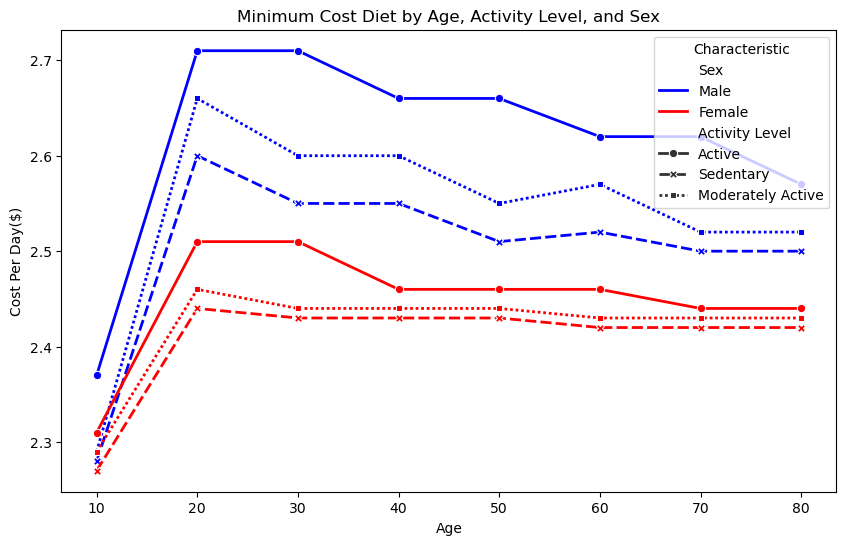

In [40]:
#lineplot
custom_palette = {"Male": "blue", "Female": "red"}
plt.figure(figsize=(10, 6))
sns.lineplot(data=dftotal, x="Age", y="Cost", hue="Sex", style="Activity Level",
             markers=True, linewidth=2, palette=custom_palette)
plt.title("Minimum Cost Diet by Age, Activity Level, and Sex")
plt.xlabel("Age")
plt.ylabel("Cost Per Day($)")
plt.legend(title="Characteristic")
plt.show()

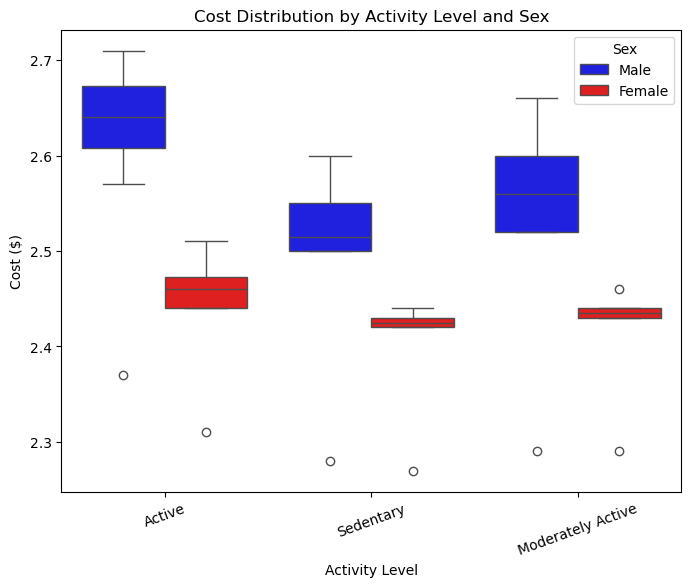

In [41]:
#boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=dftotal, x="Activity Level", y="Cost", hue="Sex", palette=custom_palette)
plt.title("Cost Distribution by Activity Level and Sex")
plt.xlabel("Activity Level")
plt.ylabel("Cost ($)")
plt.legend(title="Sex")
plt.xticks(rotation=20)
plt.show()

##### ^ these are of course all dragged down by the outliers that are the inclusion of children (10 y/o) that have steeply decreased nutritional requirements and therefore much cheaper min cost diets

In [1]:
print(f"Execution time: {end_time - start_time:.2f} seconds")
print(ages)
print(output)

NameError: name 'end_time' is not defined

In [16]:
import time

start_time = time.time()
solvercomplete(sex, age, recipes, nutrients, bmin, bmax)
end_time = time.time()

print(f"Execution time: {end_time - start_time:.2f} seconds")

Cost of diet for F's of age 25 is $2.51 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          6.85
Carp, steamed or poached                    0.08
Egg, yolk only, raw                         0.10
Split peas, from dried, fat added           5.06
Rice, white, cooked, made with margarine    1.71
Cereal, rice flakes                         0.06
Cereal, toasted oat                         0.18
Ripe plantain, raw                          3.53
Corn oil                                    0.21
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2400.0          2400.0
Protein           75.212975            46.0
Carbohydrate     295.338833           130.0
Dietary Fiber     49.525191            28.0
Linoleic Acid     39.148942            12.0
Linolenic Acid     3.688637             1.1
Calcium         1037.119697 

In [20]:
solvercomplete(sex, age,recipes, nutrients, bmin, bmax)

Cost of diet for F's of age 25 is $2.51 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                          6.85
Carp, steamed or poached                    0.08
Egg, yolk only, raw                         0.10
Split peas, from dried, fat added           5.06
Rice, white, cooked, made with margarine    1.71
Cereal, rice flakes                         0.06
Cereal, toasted oat                         0.18
Ripe plantain, raw                          3.53
Corn oil                                    0.21
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2400.0          2400.0
Protein           75.212975            46.0
Carbohydrate     295.338833           130.0
Dietary Fiber     49.525191            28.0
Linoleic Acid     39.148942            12.0
Linolenic Acid     3.688637             1.1
Calcium         1037.119697 

'2.51'

In [52]:
mincostdiet35yoM = 2.81
mincostdiet35yoMCA = 4.69
mincostdiet35yoMPA = 3.64
mincostdiet35yoMFL = 5.65
prison_pop_2022 = 1230100
total_meal_cost1day = mincostdiet35yoM * prison_pop_2022
colvaluemap = {'Min Cost Diet ($)': [mincostdiet35yoM, mincostdiet35yoMCA, mincostdiet35yoMPA, mincostdiet35yoMFL]}
summarydf = pd.DataFrame(data = colvaluemap, index = ['US', 'California', 'Pennsylvania', 'Florida'])
summarydf['Daily total ($m)'] = summarydf['Min Cost Diet ($)'] * prison_pop_2022/1000000
summarydf['Yearly total ($m)'] = summarydf['Min Cost Diet ($)'] * prison_pop_2022 * 365/1000000

In [53]:
styleddf = summarydf.copy()

In [54]:
styleddf.style.set_properties(**{
    'background-color': 'lightblue',  # Default for all
    'color': 'black',
    'font-weight': 'bold'
})
# .set_properties(subset=['Daily total ($m)'], **{'background-color': 'lightgreen'}
# ).set_properties(subset=['Yearly total ($m)'], **{'background-color': 'lightcoral'})

,Min Cost Diet ($),Daily total ($m),Yearly total ($m)
US,2.810000,3.456581,1261.652065
California,4.690000,5.769169,2105.746685
Pennsylvania,3.640000,4.477564,1634.310860
Florida,5.650000,6.950065,2536.773725


In [56]:
summarydf

,Min Cost Diet ($),Daily total ($m),Yearly total ($m)
US,2.81,3.456581,1261.652065
California,4.69,5.769169,2105.746685
Pennsylvania,3.64,4.477564,1634.310860
Florida,5.65,6.950065,2536.773725


In [73]:
data = {
    "Ingredient": [
        "Milk, low fat (1%)",
        "Egg, yolk only, raw",
        "Split peas, from dried, fat added",
        "Peanuts, unroasted",
        "Cereal, rice flakes",
        "Cereal, toasted oat",
        "Cilantro, raw",
        "Corn oil",
        "Fruit juice drink, with high vitamin C"
    ],
    "Amount (100g)": [
        10.18,
        0.15,
        7.64,
        0.14,
        0.18,
        0.09,
        0.14,
        1.03,
        2.81
    ]
}
dietdf = pd.DataFrame(data)

In [74]:
dietdf = dietdf.rename(columns = {'Amount (100g)': 'Amount 1 Day / Person (100g)'})
dietdf['Amount for Population 1 Day (kg)'] = dietdf['Amount 1 Day / Person (100g)']*prison_pop_2022/10
dietdf['Amount for Population 1 Year (kg)'] = dietdf['Amount 1 Day / Person (100g)']*prison_pop_2022/10*365

In [75]:
dietdf

,Ingredient,Amount 1 Day / Person (100g),Amount for Population 1 Day (kg),Amount for Population 1 Year (kg)
0,"Milk, low fat (1%)",10.18,1252241.8,457068257.0
1,"Egg, yolk only, raw",0.15,18451.5,6734797.5
2,"Split peas, from dried, fat added",7.64,939796.4,343025686.0
3,"Peanuts, unroasted",0.14,17221.4,6285811.0
4,"Cereal, rice flakes",0.18,22141.8,8081757.0
5,"Cereal, toasted oat",0.09,11070.9,4040878.5
6,"Cilantro, raw",0.14,17221.4,6285811.0
7,Corn oil,1.03,126700.3,46245609.5
8,"Fruit juice drink, with high vitamin C",2.81,345658.1,126165206.5


### Modeling Price Sensitivity

In [85]:
inputnutrients = nutrient_search('Milk', nutrients)
inputnutrients

,ingred_code,Ingredient description,Capric acid,Lauric acid,Myristic acid,Palmitic acid,Palmitoleic acid,Stearic acid,Oleic acid,Linoleic Acid,...,Vitamin B12,"Vitamin B-12, added",Vitamin B6,Vitamin C,Vitamin D,Vitamin E,"Vitamin E, added",Vitamin K,Water,Zinc
12,1015,"cheese, cottage, lowfat, 2% milkfat",0.060,0.061,0.199,0.561,0.030,0.218,0.460,0.070,...,0.47,0.0,0.057,0.0,0.0,0.08,0.0,0.0,81.24,0.51
13,1016,"cheese, cottage, lowfat, 1% milkfat",0.019,0.016,0.107,0.308,0.036,0.116,0.239,0.022,...,0.63,0.0,0.068,0.0,0.0,0.01,0.0,0.1,82.48,0.38
22,1026,"cheese, mozzarella, whole milk",0.582,0.690,2.189,5.331,0.597,2.442,5.649,0.393,...,2.28,0.0,0.037,0.0,0.4,0.19,0.0,2.3,50.01,2.92
23,1027,"cheese, mozzarella, whole milk, low moisture",0.412,0.255,2.683,7.491,0.822,2.880,5.925,0.566,...,0.73,0.0,0.062,0.0,0.5,0.21,0.0,2.5,48.38,2.46
24,1028,"cheese, mozzarella, part skim milk",0.251,0.164,1.598,4.855,0.440,1.937,3.874,0.335,...,0.82,0.0,0.070,0.0,0.3,0.14,0.0,1.6,53.78,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,42290,"milk, fluid, nonfat, calcium fortified (fat fr...",0.004,0.003,0.017,0.053,0.007,0.019,0.038,0.005,...,0.38,0.0,0.040,1.0,1.2,0.01,0.0,0.0,90.80,0.40
2666,43352,"cheese, cottage, lowfat, 1% milkfat, no sodium...",0.018,0.016,0.104,0.302,0.036,0.115,0.235,0.022,...,0.63,0.0,0.070,0.0,0.0,0.01,0.0,0.1,83.50,0.38
2670,43369,"chocolate-flavored drink, whey and milk based",0.002,0.001,0.010,0.143,0.001,0.139,0.048,0.008,...,0.06,0.0,0.011,2.0,1.3,0.01,0.0,0.1,87.63,0.16
2679,43396,"cheese, cottage, lowfat, 1% milkfat, with vege...",0.019,0.019,0.106,0.302,0.039,0.116,0.233,0.029,...,0.49,0.0,0.050,4.0,0.0,0.01,0.0,2.6,83.50,0.29


In [80]:
solvercomplete(sex,age, recipes,inputnutrients, bmin, bmax)

Cost of diet for F's of age 25 is $2.49 per day.

The diet will consist of (in 100s of grams or milliliters):
Milk, low fat (1%)                                   11.58
Split peas, from dried, fat added                     7.03
Textured vegetable protein, dry                       0.08
Brazil nuts                                           0.00
Rice, white, cooked, made with margarine              0.10
Cereal (Kellogg's All-Bran Complete Wheat Flakes)     0.06
Cereal, toasted oat                                   0.10
Mustard greens, fresh, cooked, no added fat           0.82
Corn oil                                              0.22
dtype: float64

With the following nutritional outcomes of interest:
                    Outcome  Recommendation
Nutrient                                   
Energy               2000.0          2000.0
Protein          101.760965            46.0
Carbohydrate     216.724697           130.0
Dietary Fiber     60.402242            22.4
Linoleic Acid     29.65400

'2.49'